# K-Mean 觀察 : 使用輪廓分析

# [作業目標]
- 試著模仿範例寫法, 利用隨機生成的 5 群高斯分布資料, 以輪廓分析來觀察 K-mean 分群時不同 K 值的比較

# [作業重點]
- 使用輪廓分析的圖表, 以及實際的分群散佈圖, 觀察 K-Mean 分群法在 K 有所不同時, 分群的效果如何變化 (In[3], Out[3])

# 作業
* 試著模擬出 5 群高斯分布的資料, 並以此觀察 K-mean 與輪廓分析的結果  

In [1]:
# 載入套件
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_samples, silhouette_score

np.random.seed(5)

%matplotlib inline

In [2]:
# 生成 5 群資料
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=5,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=123) 

# 設定需要計算的 K 值集合
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

In [5]:
# 計算並繪製輪廓分析的結果
for n in range_n_clusters:
    est = KMeans(n_clusters=n, random_state=33)
    label = est.fit_predict(X)
    sil_score = silhouette_score(X, label)
    print('for n = ', n, ',the silhouette score average is', sil_score)

for n =  2 ,the silhouette score average is 0.5027144446956527
for n =  3 ,the silhouette score average is 0.6105565451092732
for n =  4 ,the silhouette score average is 0.6270122040179333
for n =  5 ,the silhouette score average is 0.6115749260799671
for n =  6 ,the silhouette score average is 0.5502355712512128
for n =  7 ,the silhouette score average is 0.4685319833104585
for n =  8 ,the silhouette score average is 0.39081592416194766


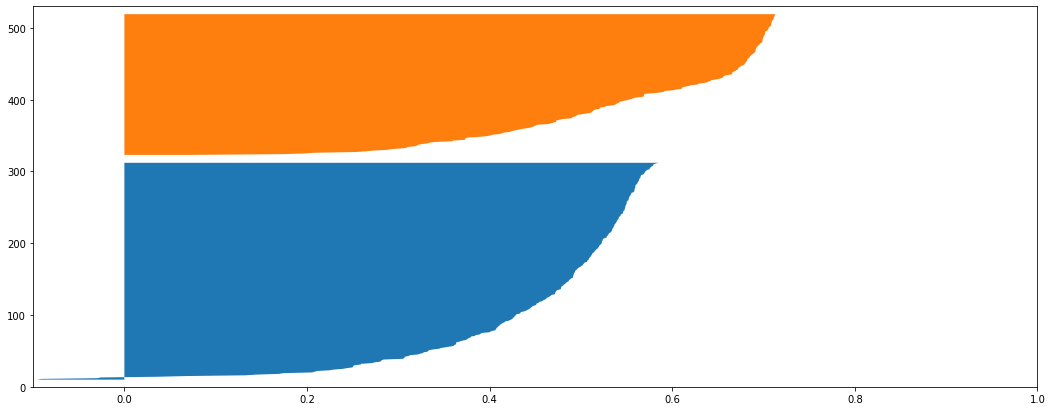

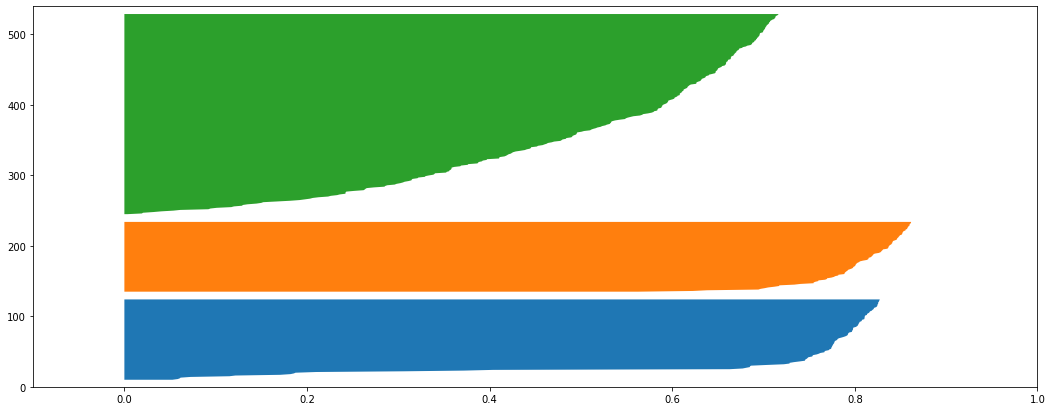

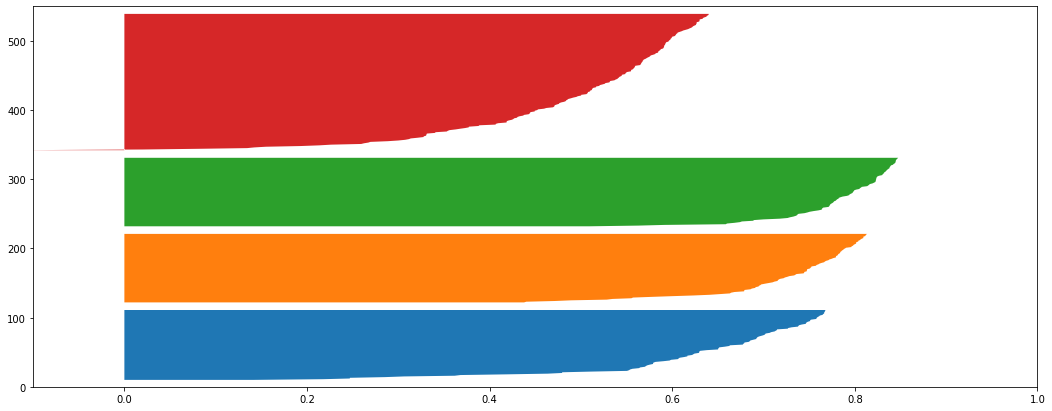

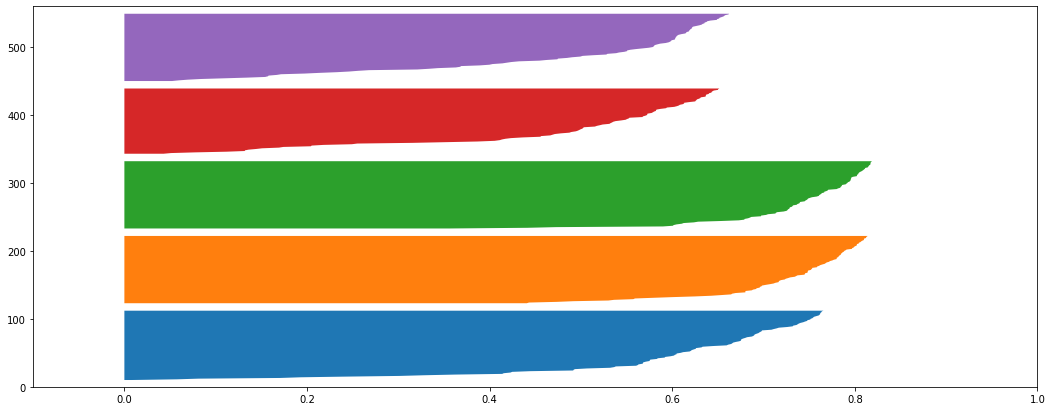

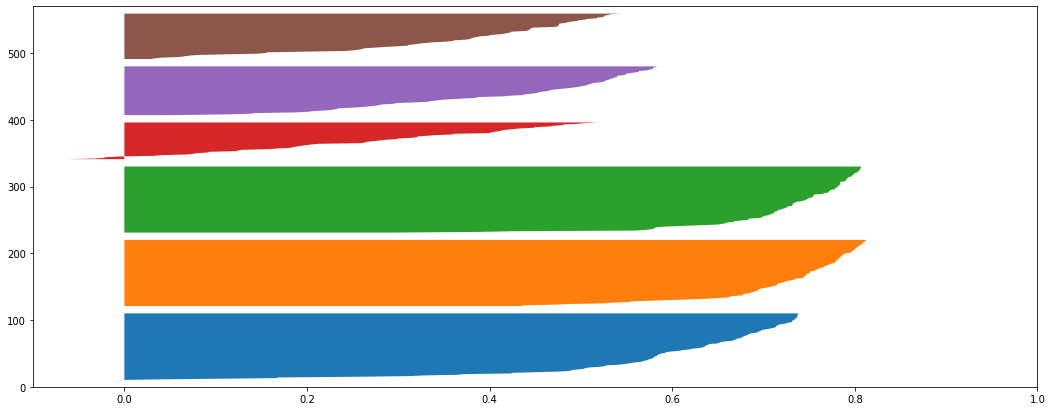

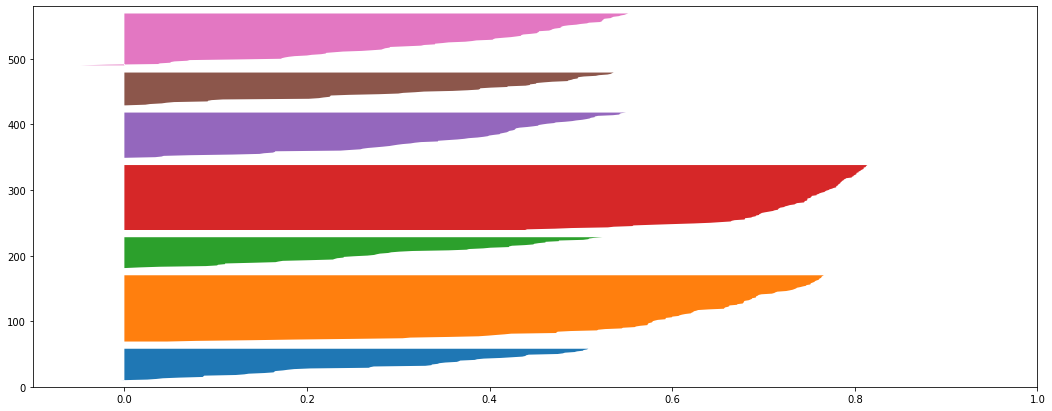

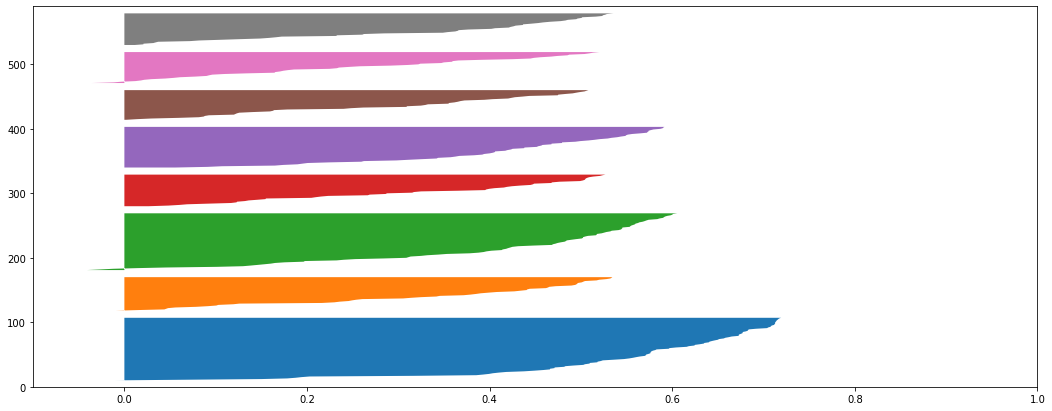

In [25]:
for n in range_n_clusters:
    fig, ax = plt.subplots(1,1)
    fig.set_size_inches(18,7)
    
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(X)+(n+1)*10])
    
    clusterer = KMeans(n_clusters=n, random_state=33)
    cluster_label = clusterer.fit_predict(X)
    
    sample_sil_values = silhouette_samples(X, cluster_label)
    
    y_lower = 10
    for i in range(n):
        ith_sample_sil_values = sample_sil_values[cluster_label == i]
        ith_sample_sil_values.sort()
    
        size_i = ith_sample_sil_values.shape[0]
        y_upper = y_lower+size_i
        
        ax.fill_betweenx(y= np.arange(y_lower, y_upper), x1= 0, x2=ith_sample_sil_values)
        
        y_lower = y_upper+10
